# 🌸 Petals

This work is done by **Ian Feekes** for kaggle competitions and machine learning education.

Please feel free to contact me at **ianfeekes@gmail.com** or **https://linkedin.com/in/ianfeekes**

## ⚙️ Initial Configuration

### Downloading the Data

This dataset can be accesed through running the following bash commands:
```bash
kaggle datasets download -d arshid/iris-flower-dataset
unzip archive.zip
rm -rf archive.zip
```

Or going to the [kaggle data card](https://www.kaggle.com/datasets/arshid/iris-flower-dataset) and manually downloading.

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 🔍 EDA

### ⬇️ Loading the Data

There are ```5``` features and ```150``` entrries in the current iris dataset we are working with.

In [3]:
df = pd.read_csv('./IRIS.csv')
df.shape

(150, 5)

### Basic Data Characteristics

We are looking at all numerical datatypes with the exception of **species** which appears to be categorical and is the target variable.

In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

There are no missing values.

In [5]:
sum(df.isna().sum())

0

It looks like all of the dependent variables follow relatively normal distributions with the petal length having the worst variance.

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 🎯 Species (Target Variable)

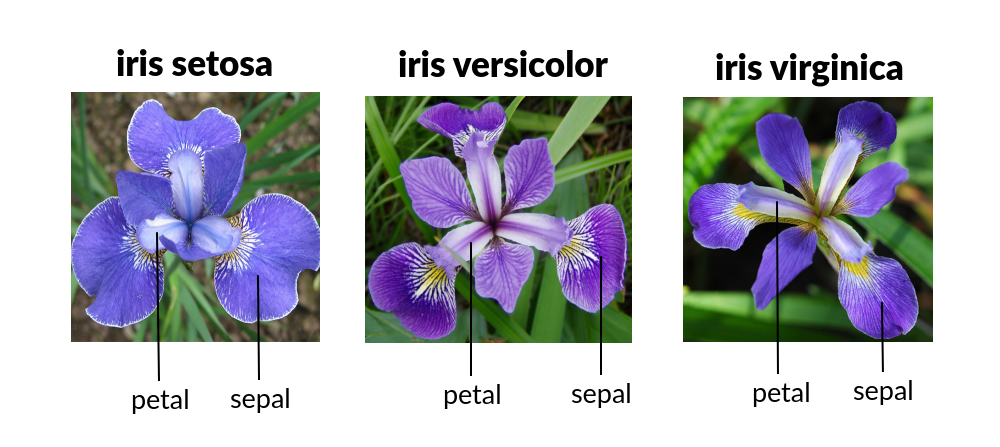

The varieties of species are split perfectly

In [7]:
target = 'species'
df[target].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Sepal Length

The **Sepal** is the leaf things that encase the colorful petals.

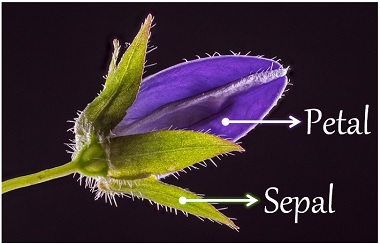

There aren't any outliers outside of the 9% and 91% quartile range, but the plot seems to show a bit of a left skew for **sepal length** so different normalization techniques may be worth considering.

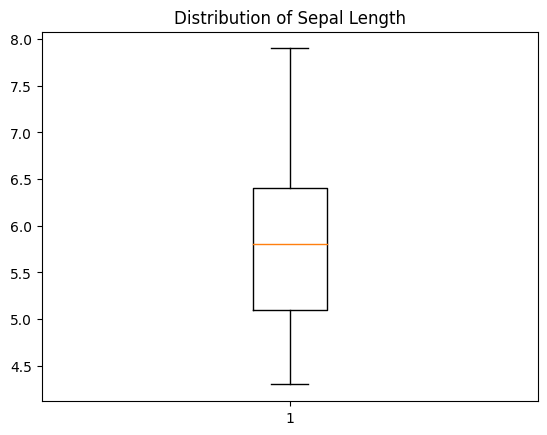

In [8]:
plt.boxplot(df['sepal_length'])
plt.title("Distribution of Sepal Length")
plt.show()

There are no immediately-clear clusters for binning sepal length seen from the histogram.

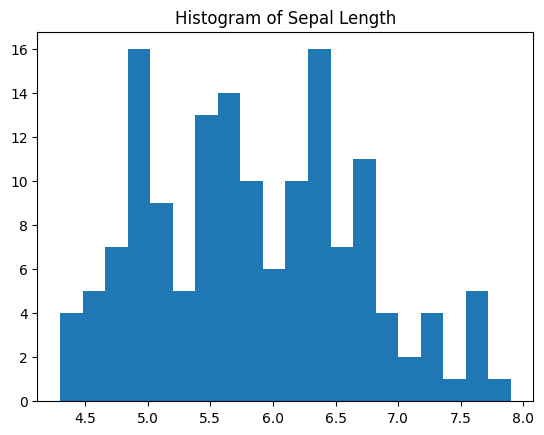

In [9]:
plt.hist(df['sepal_length'], bins=20)
plt.title("Histogram of Sepal Length")
plt.show()

In [10]:
def species_encode(x):
    if x == 'Iris-setosa':
        return 0
    elif x == 'Iris-versicolor':
        return 1
    return 2

df['species_encoded'] = df['species'].apply(species_encode)
df['species_encoded'].value_counts()

species_encoded
0    50
1    50
2    50
Name: count, dtype: int64

Through graphing a side-by-side of the encoded species types to the sepal length we get some valuable insights:
* 4.3 - 5.8 range is all for ```Iris-setosa```, with a mean of ```5.0```
* 4.9 - 7.1 range is all for the ```Iris-veriscolor```, with a mean of ```5.9```
* 5.5 - 8.0 range is all ```Iris-verginica``` with the exception of a single outlier, with a mean of ```6.5```

The distribution's variances seems apparently tightest with the setosa, and becomes a little looser with the veriscolor and verginica.

**Hypothesis**: the single outlier may be a younger flower/plant and ratios of these features may be of more interest.

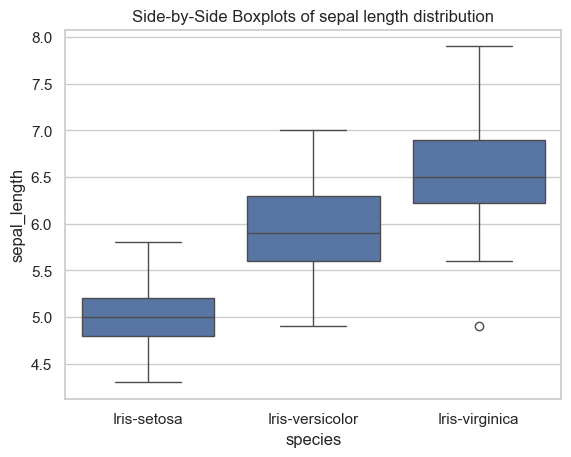

In [11]:
import seaborn as sns

# Set the style (optional)
sns.set(style="whitegrid")

# Create a boxplot
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title("Side-by-Side Boxplots of sepal length distribution")

# Show the plot
plt.show()

### Sepal Width

**Sepal Width** has a few outliers, with one as low as **2** and three other values that are greater than **4**. The distribution is fairly tight compared to the other features, which is what enables the existence of these outliers.

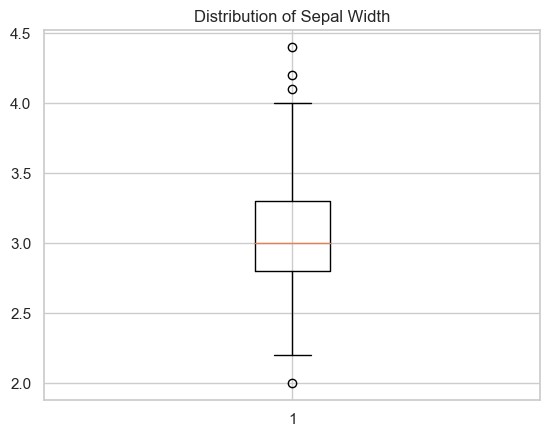

In [12]:
plt.boxplot(df['sepal_width'])
plt.title("Distribution of Sepal Width")
plt.show()

We have a more normal distribution with the **Sepal Width** histogram. Maybe a few clusters of note are between 2.5 and 3.0, 3.1 and 3.5, and 3.6 and 4.0 but they are not particularly protrusive.

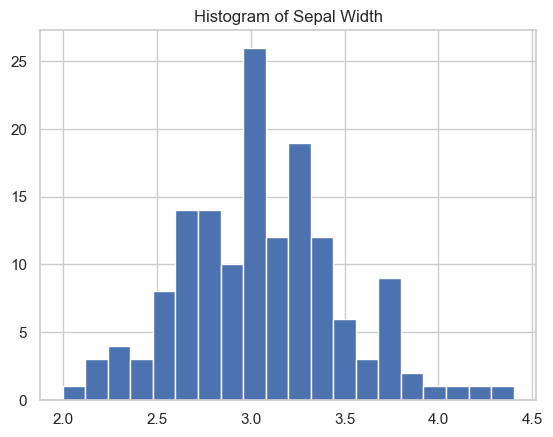

In [13]:
plt.hist(df['sepal_width'], bins=20)
plt.title("Histogram of Sepal Width")
plt.show()

Again, the side-by-side boxplots prove particularly useful:
* Setosa variant has the higher distribution with most values between ```3.1``` and ```3.7```, exibiting a mean of ```3.4```
* Versicolor variant has the lowest-values in its distribution with most values between ```2.5``` and ```3```, exibiting a mean of ```2.8```
* Virginica is right in between with a much-tighter variance. Most values fall between ```2.7``` and ```3.2``` which overlaps with common distributions of both species.

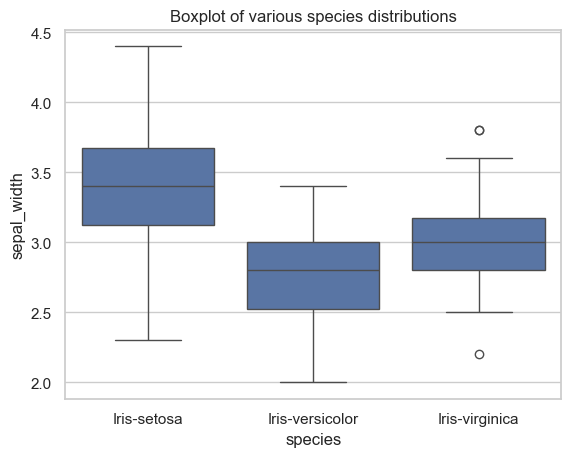

In [14]:
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title("Boxplot of various species distributions")
plt.show()

### Exploring Relatinonship between Petal Sizes and Species

The below scatterplot shoes the points with their sepal length and widths, colored by the species which gives us some insights.
* There is a clear cluster showing ratios of length/width under the line y=x
* While there is some overlap between virginica and versicolor, they still tend to have some cluster separations with the virginica tending to exibit higher lengths and widths, with the versicolor exibiting more moderate lengths and widths.

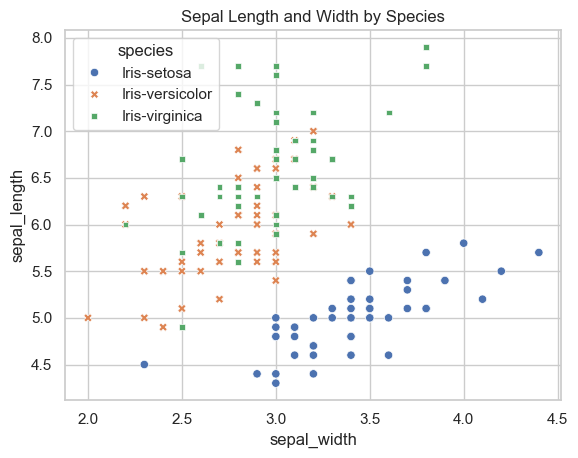

In [15]:
# Create the scatter plot
sns.scatterplot(data=df, x='sepal_width', y='sepal_length', hue='species', style='species')
plt.title("Sepal Length and Width by Species")
plt.show()

### ❁ Petals

#### Petal Length

The petal lenfgth has a very high variance with most values between ```1.6``` and ```5.1``` 
$\mu = 4.2$

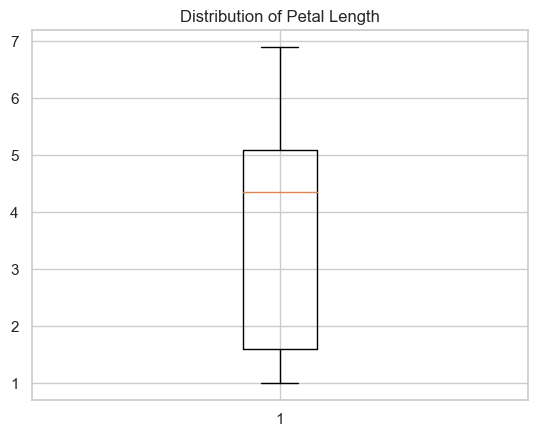

In [16]:
plt.boxplot(df['petal_length'])
plt.title("Distribution of Petal Length")
plt.show()

Here we finally see some interesting clusters. It could be useful to consider featuring some bins as such:
* **Petal_Length_Small** $x: 1\leq{x}\leq{2.2}$
* **Petal_Length_Normal** $x: 2.7\leq{x}\leq{7}$

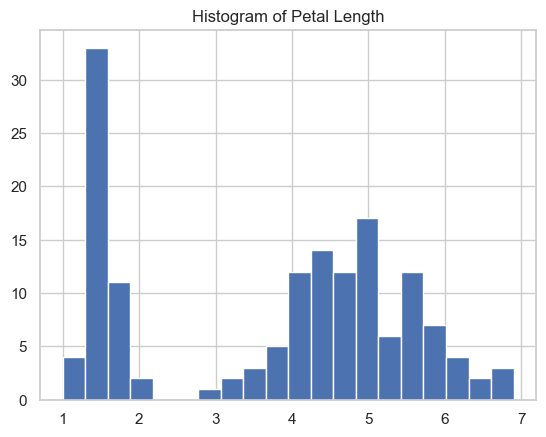

In [17]:
plt.hist(df['petal_length'], bins=20)
plt.title("Histogram of Petal Length")
plt.show()

We see that every single point in the would-be **Petal_Length_Small** distribution (denoted in the above markdown) classifies ```Iris-setosa```.

Similarly with our observations on **sepal** characteristics, the ```virginica``` and ```versicolor``` species are tied together in the sizing aspect, with the ```versicolor``` being slightly smaller albeit overlap being exibited in the data distributions.

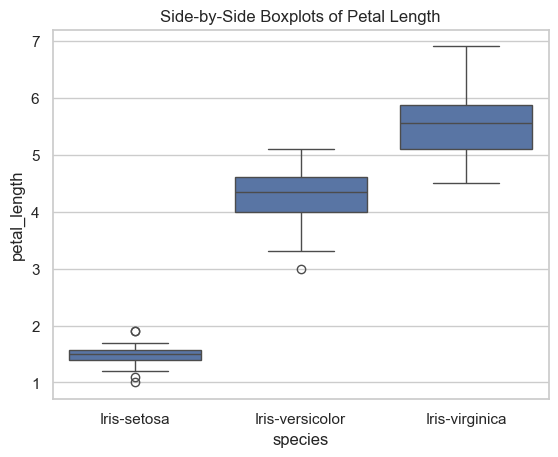

In [18]:
sns.boxplot(df, y = 'petal_length', x = 'species')
plt.title("Side-by-Side Boxplots of Petal Length")
plt.show()

#### Petal Width

Likewise with the **Petal Width**, the **Petal Length** exhibits a high variance nearly approaching the whiskers of the boxplot.

$\mu = 1.3$

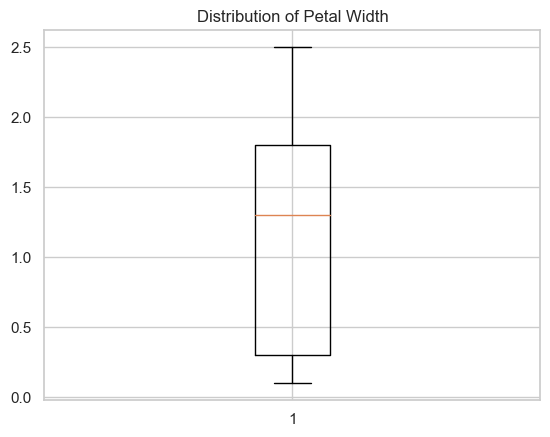

In [19]:
plt.boxplot(df['petal_width'])
plt.title("Distribution of Petal Width")
plt.show()

Similarly to the **Length**, there are some notable potentail data bins here:
* **Petal_Width_Small** $x: 0\leq{x}\leq{0.8}$
* **Petal_Width_Medium** $x: 0.8\leq{x}\leq{1.75}$
* **Petal_Width_Large** ${x: 1.76\leq{x}\leq{2.5}}$

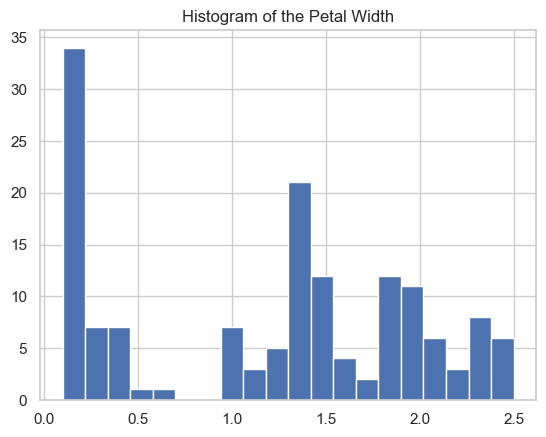

In [20]:
plt.hist(df['petal_width'], bins=20)
plt.title("Histogram of the Petal Width")
plt.show()

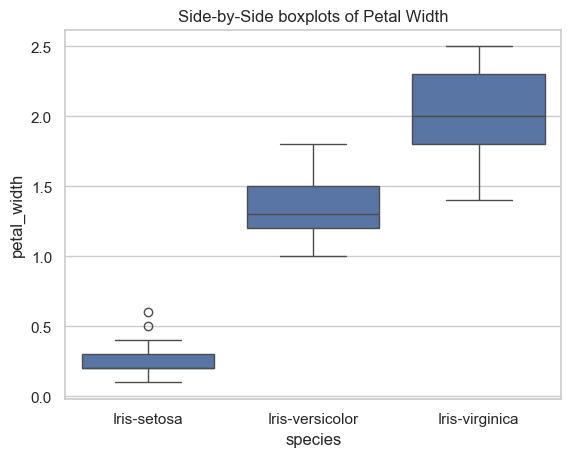

In [21]:
sns.boxplot(data = df, x='species', y='petal_width')
plt.title("Side-by-Side boxplots of Petal Width")
plt.show()

#### Relationship of Petal Length and Width

This relationship is even more clear than that of the sepal characteristics. Nearly all the petals exibit ~4:1 length to width proportion (with some noise) - they could nearly be graphed on the same regression line.

There are fairly clear splits between each of the clusters: the ```setosa``` is by far the smallest petals, followed in respective size by the ```versicolor``` and ```virginica```. This plot may be the 🔑 key to deliniating species given the relatively small overlap (~6 datapoints) between versicolor and virginica which both tend to blend a lot more with the **sepal** characteristics.

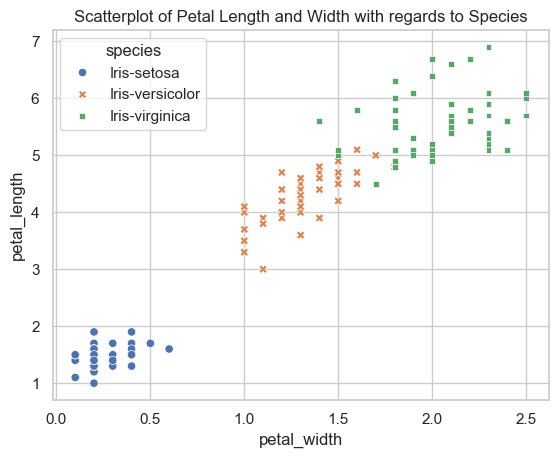

In [22]:
sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='species', style='species')
plt.title("Scatterplot of Petal Length and Width with regards to Species")
plt.show()

#### Petal Sum

It is worth exploring petals as a sum of their length and width as a feature.

<Axes: xlabel='sepal_length', ylabel='petal_sum'>

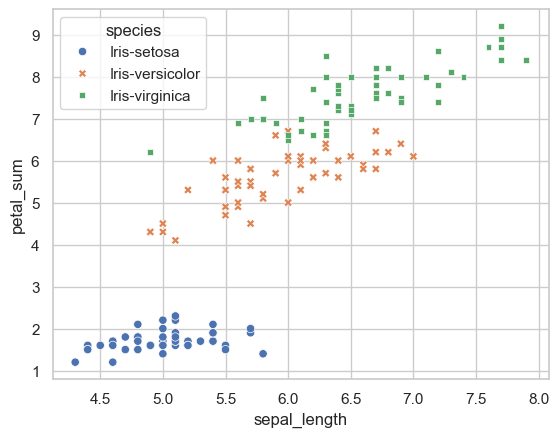

In [23]:
df['petal_sum'] = df['petal_length'] + df['petal_width']
df['petal_product'] = df['petal_length'] * df['petal_width']
# df['sepal_sum'] = df['sepal_length'] + df['sepal_width']
# df['sepal_product'] = df['sepal_length'] * df['sepal_width']
df['sepal_length_sq'] = df['sepal_length'] * df['sepal_length']
df['sepal_ratio'] = df['sepal_width'] / df['sepal_length']
sns.scatterplot(data=df, x='sepal_length', y='petal_sum', hue='species', style='species')

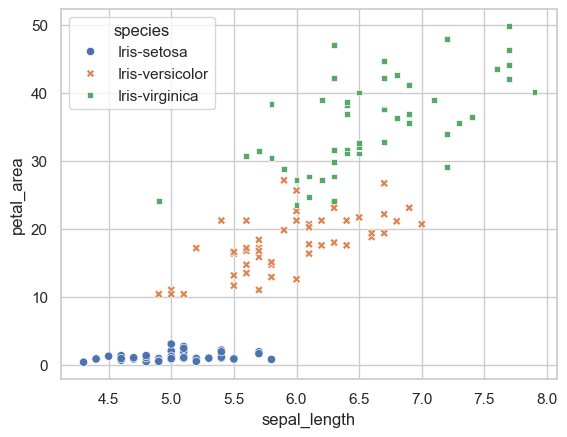

In [24]:
import math

df['petal_area'] = df['petal_length'] * df['petal_width'] * math.pi
sns.scatterplot(data=df, x='sepal_length', y='petal_area', hue='species', style='species')
plt.show()

<Axes: xlabel='sepal_length', ylabel='petal_product'>

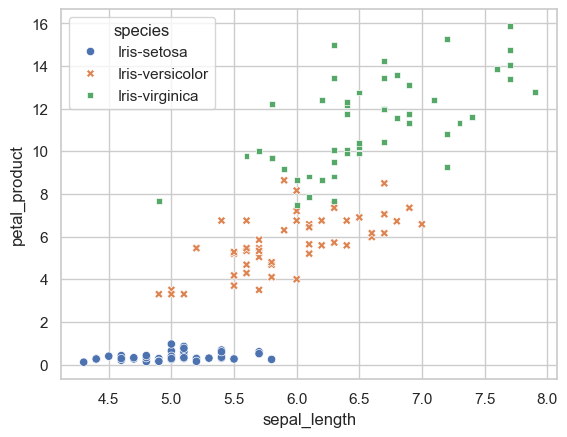

In [25]:
sns.scatterplot(data=df, x='sepal_length', y='petal_product', hue='species', style='species')

<Axes: xlabel='sepal_area', ylabel='petal_area'>

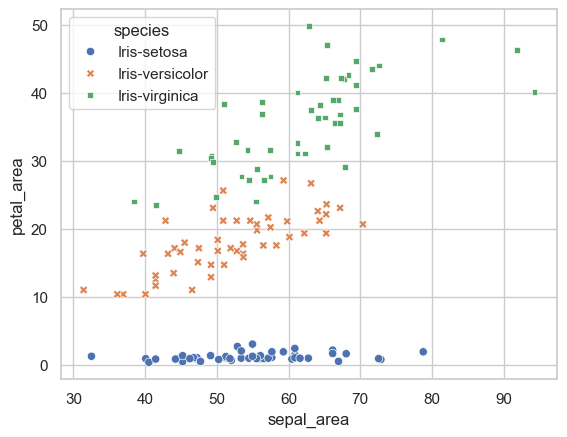

In [26]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width'] * math.pi
sns.scatterplot(data=df, x='sepal_area', y='petal_area', hue='species', style='species')

<Axes: xlabel='sepal_ratio', ylabel='petal_area'>

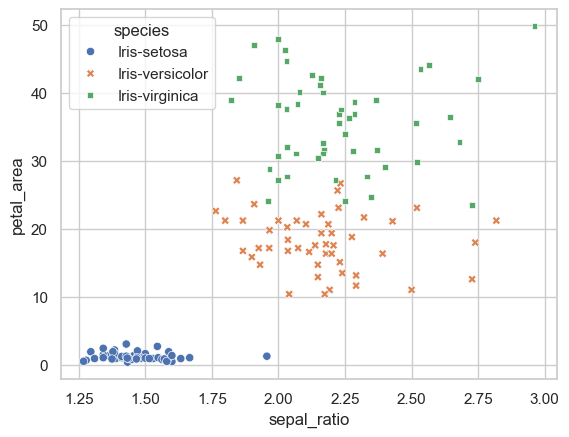

In [27]:
df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']
sns.scatterplot(data=df, x='sepal_ratio', y='petal_area', hue='species', style='species')

### Looking at Correlation

In [29]:
df_temp = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_encoded', 'petal_sum',
       'sepal_ratio', 'sepal_length_sq', 'petal_product', 'petal_area',
       'sepal_area']].copy()

# df_temp.corr()['species_encoded'].sort_values()

In [30]:
temp = pd.get_dummies(df_temp['species_encoded'])

In [31]:
df_temp['species_0'] = temp[0]
df_temp['species_1'] = temp[1]
df_temp['species_2'] = temp[2]

```Setosa``` variety has the highest correlation with petal width, sepal_ratio, and petal_product. Though we aren't too worried about analysis for this given linear separability will work for it.

In [32]:
df_temp.corr()['species_0'].sort_values()

petal_length      -0.922688
petal_sum         -0.919312
petal_width       -0.887510
species_encoded   -0.866025
sepal_ratio       -0.855160
petal_product     -0.817374
petal_area        -0.817374
sepal_length      -0.717416
sepal_length_sq   -0.689607
species_2         -0.500000
species_1         -0.500000
sepal_area        -0.125888
sepal_width        0.595601
species_0          1.000000
Name: species_0, dtype: float64

#### Versicolora Correlation Analytics

```Versicolora``` variety has the highest correlation with a medium sepal width, sepal area, sepal ratio and petal product

In [33]:
df_temp.corr()['species_1'].sort_values()

species_2         -5.000000e-01
species_0         -5.000000e-01
sepal_width       -4.646996e-01
sepal_area        -2.696492e-01
petal_area        -1.094782e-02
petal_product     -1.094782e-02
species_encoded    4.038222e-17
sepal_length_sq    4.801955e-02
sepal_length       7.939552e-02
petal_width        1.183760e-01
petal_sum          1.778644e-01
petal_length       2.015868e-01
sepal_ratio        3.652530e-01
species_1          1.000000e+00
Name: species_1, dtype: float64

In [35]:
df_temp.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_encoded', 'petal_sum', 'sepal_ratio', 'sepal_length_sq',
       'petal_product', 'petal_area', 'sepal_area', 'species_0', 'species_1',
       'species_2'],
      dtype='object')

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_temp[[
    'sepal_length',
    'sepal_area',
    # 'sepal_ratio',
    'sepal_width',
    'petal_product'
]]

y = df_temp['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


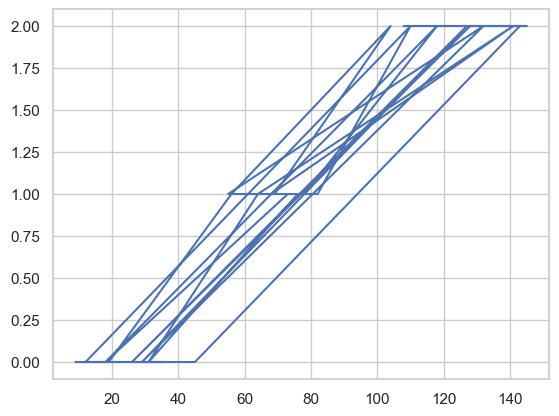

In [61]:
plt.plot(y_test)

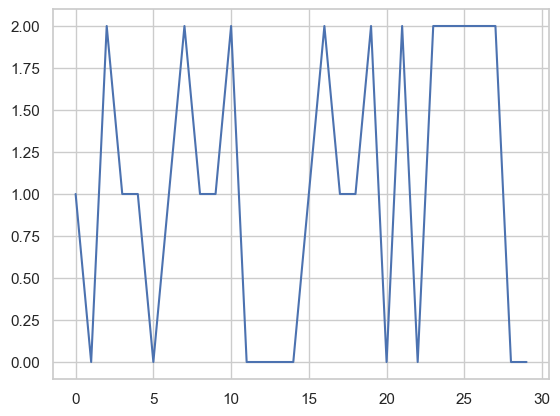

In [60]:
plt.plot(pred)

#### Virginica Correlation Analytics

In [34]:
df_temp.corr()['species_2'].sort_values()

species_0         -0.500000
species_1         -0.500000
sepal_width       -0.130901
sepal_area         0.395537
sepal_ratio        0.489907
sepal_length       0.638020
sepal_length_sq    0.641587
petal_length       0.721102
petal_sum          0.741447
petal_width        0.769134
petal_area         0.828321
petal_product      0.828321
species_encoded    0.866025
species_2          1.000000
Name: species_2, dtype: float64